# Income Forecast

# Income Forecast for Financial Institutions

## Introduction
Income forecasting is an essential tool for financial institutions, as it allows for more informed and strategic decision-making. Based on a customer's estimated income, it is possible to define:

- **The maximum loan amount** that can be granted.
- **The credit limit** for cards and other credit lines.
- **The offering of suitable financial products**, such as credit cards of different categories (basic, gold, platinum).
- **Customer segmentation** for personalized marketing campaigns.

## Dataset Description
The provided dataset contains customer registration information, such as:

- **Age**
- **Gender**
- **Vehicle ownership**
- **Property ownership**
- **Income type**
- **Education**
- **Marital status**
- **Employment duration**
- And more.

These variables can be used to understand how customer characteristics relate to their income and, consequently, build a predictive model to estimate the income of future customers.

## Project Objectives
The main objective of this project is to develop a predictive model to estimate customers' income based on their registration characteristics. This model will be used to:

1. **Assist in decision-making** regarding credit limits, loan amounts, and financial product offerings.
2. **Improve customer segmentation** for marketing and sales campaigns.
3. **Reduce risks** when granting credit, ensuring that offers align with the customer's financial capacity.


## Data Understanding

At this stage, the objective is to understand the available data, its structure, quality, and relevance to the project. The provided dataset contains customer registration information, which will be used to predict income. Below, we describe the main characteristics of the data and provide a detailed dictionary of variables.

### Summary of Data Understanding
- **Dataset Size:** The dataset contains 14 columns and 14 rows (example provided).
- **Variables:** The variables include demographic information (age, gender, marital status), socioeconomic details (vehicle ownership, property ownership, income type), and financial attributes (income).
- **Missing Data:** The `employment_time` column contains null values, which will require treatment during data preparation.
- **Data Types:** The dataset contains numerical variables (age, employment_time, income) and categorical variables (gender, income_type, education, marital_status).
- **Possible Relationships:** It is expected that variables such as `employment_time`, `education`, and `income_type` have a significant correlation with income.

### Data Dictionary

| Variable               | Description                                          | Type        |
| ---------------------- |:---------------------------------------------------:| -----------:|
| data_ref              | Reference date for data collection.                 | Date (object) |
| customer_id           | Unique identifier for the customer.                 | Integer     |
| gender                | Customer's gender (M = Male, F = Female).           | Categorical |
| vehicle_ownership     | Indicates whether the customer owns a vehicle (True/False). | Boolean |
| property_ownership    | Indicates whether the customer owns a property (True/False). | Boolean |
| num_children          | Number of children the customer has.                 | Integer     |
| income_type           | Type of customer income (e.g., Entrepreneur, Salaried). | Categorical |
| education             | Customer's education level (e.g., Secondary, Higher education). | Categorical |
| marital_status        | Customer's marital status (e.g., Single, Married, Widowed). | Categorical |
| residence_type        | Type of customer's residence (e.g., House, Governmental). | Categorical |
| age                   | Customer's age in years.                            | Integer     |
| employment_time       | Time in current job (in years). May contain null values. | Float |
| num_residents         | Number of people living in the residence.           | Float      |
| income                | Customer's income (target variable to be predicted). | Float      |


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import joblib

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [101]:
income = pd.read_csv('./input/previsao_de_renda.csv')

In [102]:
income.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.603,1.000,8060.340


### Data Understanding - Univariate Analysis
At this stage, we typically evaluate the distribution of all variables.


In [103]:
metadados = pd.DataFrame({'dtypes': income.dtypes})
metadados['missing'] = income.isna().sum()
metadados['perc_missing'] = round((metadados['missing']/income.shape[0])*100)
metadados['valores_unicos'] = income.nunique()
metadados

,dtypes,missing,perc_missing,valores_unicos
Unnamed: 0,int64,0,0.000,15000
data_ref,object,0,0.000,15
id_cliente,int64,0,0.000,9845
sexo,object,0,0.000,2
posse_de_veiculo,bool,0,0.000,2
posse_de_imovel,bool,0,0.000,2
qtd_filhos,int64,0,0.000,8
tipo_renda,object,0,0.000,5
educacao,object,0,0.000,5
estado_civil,object,0,0.000,5


Text(0, 0.5, 'count')

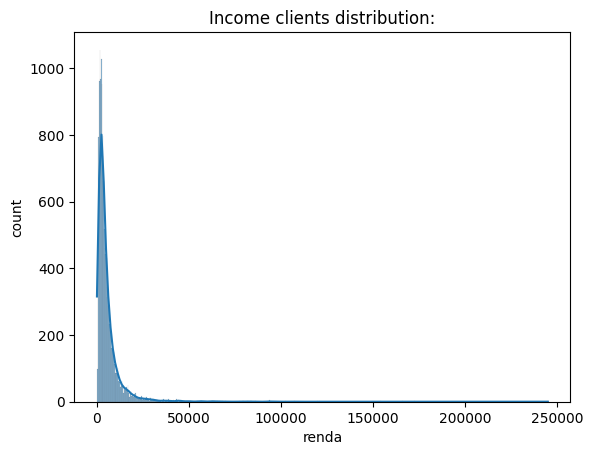

In [104]:
sns.histplot(data=income,
            x='renda', 
            kde=True
            )
plt.title('Income clients distribution:')
plt.ylabel('count')

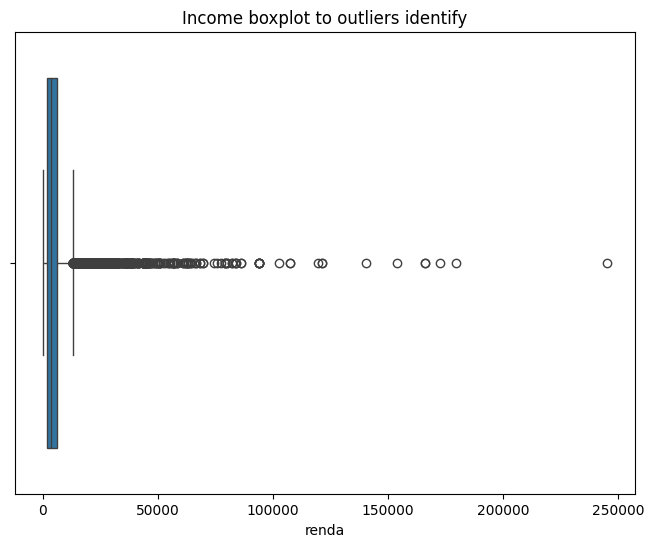

Outliers number of variable 'renda' from statistian point of view: 1221


In [105]:
# Boxplot to Identify Outliers in the 'renda' Variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=income['renda'])
plt.title('Income boxplot to outliers identify')
plt.xlabel('renda')
plt.show()

# Calculation of the Interquartile Range (IQR) to Identify Outliers
Q1 = income['renda'].quantile(0.25)
Q3 = income['renda'].quantile(0.75)
IQR = Q3 - Q1
outliers = income[(income['renda'] < (Q1 - 1.5 * IQR)) | (income['renda'] > (Q3 + 1.5 * IQR))]
print("Outliers number of variable 'renda' from statistian point of view:", outliers.shape[0])

Text(0, 0.5, 'Contagem')

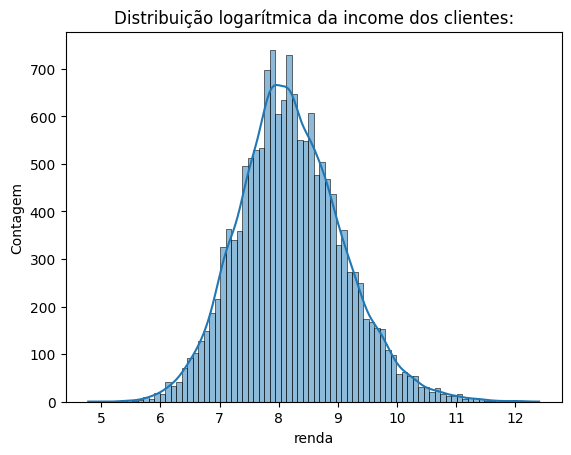

In [106]:
sns.histplot(data=income, 
             x=np.log(income['renda']),
             kde=True
             )
plt.title('Distribuição logarítmica da income dos clientes:')
plt.ylabel('Contagem')

1. **Shape of the Distribution**:
   - The distribution resembles a normal curve, indicating symmetry after the logarithmic transformation.
   - The peak of the distribution occurs around the logarithmic value of 8, suggesting that most customers have incomes close to this value on the transformed scale.

2. **Motivation for Logarithmic Transformation**:
   - The logarithmic transformation is useful for handling skewed data and reducing the impact of extreme values (outliers).
   - This transformation also facilitates statistical analysis by making the data closer to a normal distribution, which can be beneficial for predictive models.


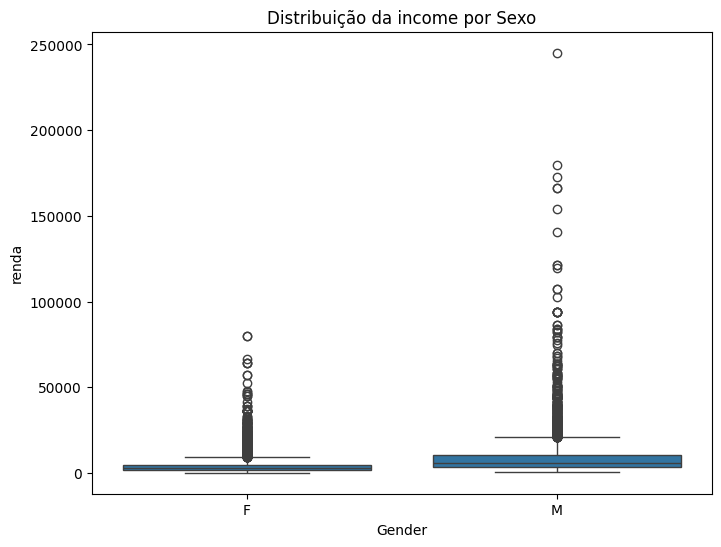

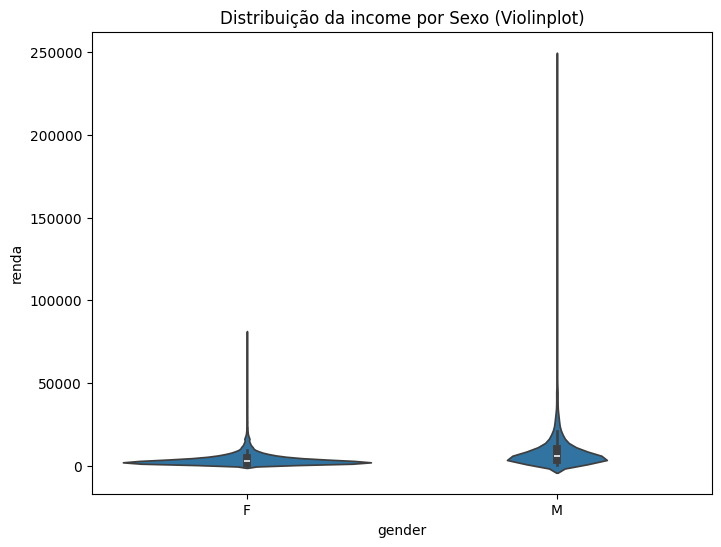

In [107]:
# Boxplot from income for gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sexo', y='renda', data=income)
plt.title('Distribuição da income por Sexo')
plt.xlabel('Gender')
plt.ylabel('renda')
plt.show()

# Violinplot from income for gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='sexo', y='renda', data=income)
plt.title('Distribuição da income por Sexo (Violinplot)')
plt.xlabel('gender')
plt.ylabel('renda')
plt.show()

**Boxplot**:
   - The boxplot reveals that most incomes are concentrated at lower values, with some small differences between the sexes.
   - Outliers are common in both groups, with values exceeding 250,000.
   - The median income for males is slightly higher than for females, but the difference is small.

**Violinplot**:
   - The violinplot complements the boxplot, showing the density of the income distribution.
   - The highest density occurs for lower incomes, while higher values have a low frequency.
   - Variability is greater for males, especially among the outliers.


## Data Understanding - Bivariate Analysis

### Bivariate Analysis with Categorical Variables

In [108]:
# Graphic pointplot
def point (var: str):   
    plt.figure(figsize=(10,6))
    sns.pointplot(data=income,
                  x=var,
                  y='renda',
                  dodge=True,
                  errorbar=('ci', 95)
                  )
    plt.title(f'Mean income in function of {var}')
    plt.ylabel('Mean income')

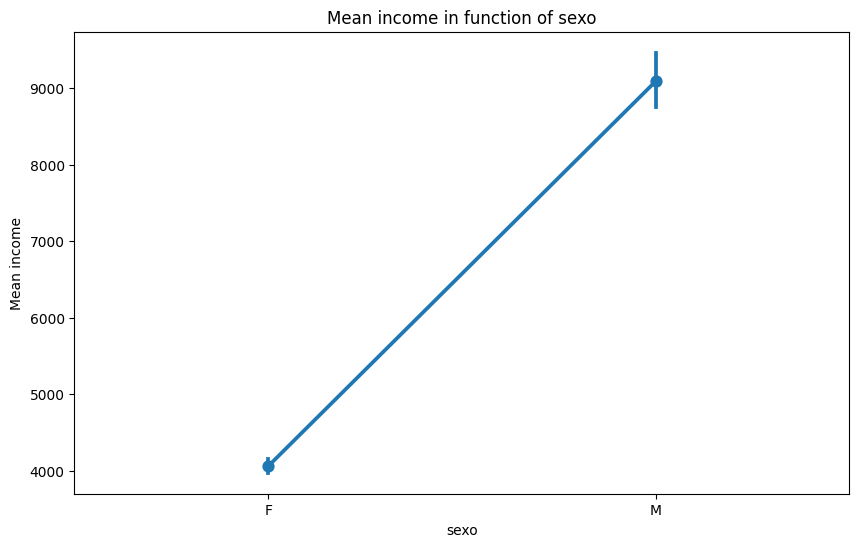

In [109]:
point('sexo')  

The average income is statistically different across the different classes of the `sexo` variable, indicating a potential predictive relationship for income.

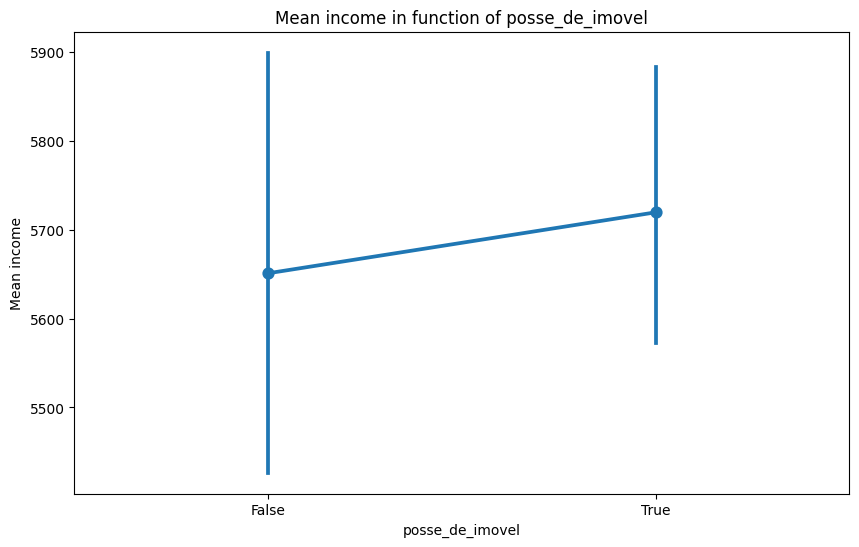

In [110]:
point('posse_de_imovel')

The variable `posse_de_imovel` does not show predictive potential, as there is no significant difference in the average income between those who own property and those who do not.


In [111]:
# Graphic barplot
def bar (var: str):    
    plt.figure(figsize=(10,6))
    grb = income.groupby(var)['renda'].mean().sort_values()
    ax = sns.barplot(x=grb.index,
                     y=grb,
                     palette='flare'
                    )
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.tick_params(axis='x', rotation=30)
    ax.set_title(f'Mean income in function of {var}')
    ax.set_ylabel('Mean income')

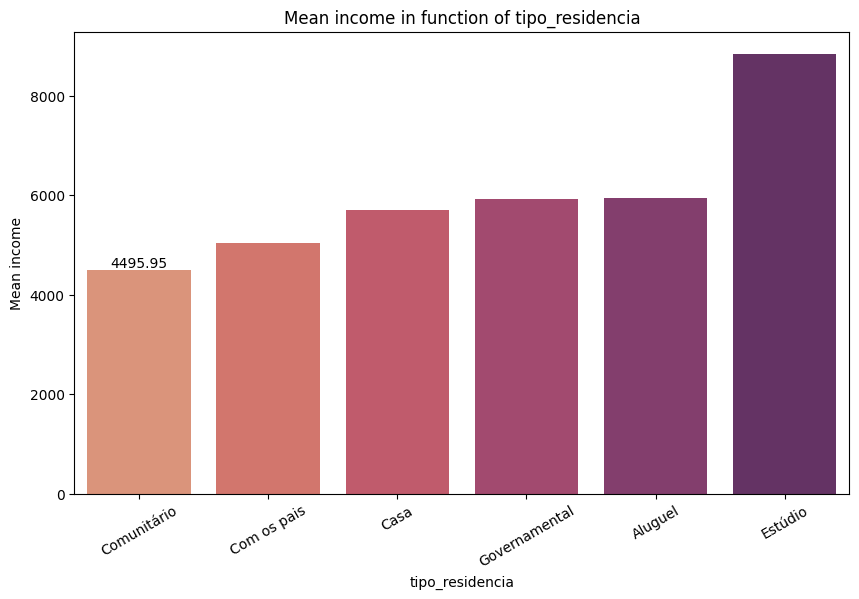

In [112]:
bar('tipo_residencia')

The variable `tipo_residencia` shows different average income values across some classes. However, for the classes `casa`, `governamental`, and `aluguel`, the differences are minimal and not statistically significant.

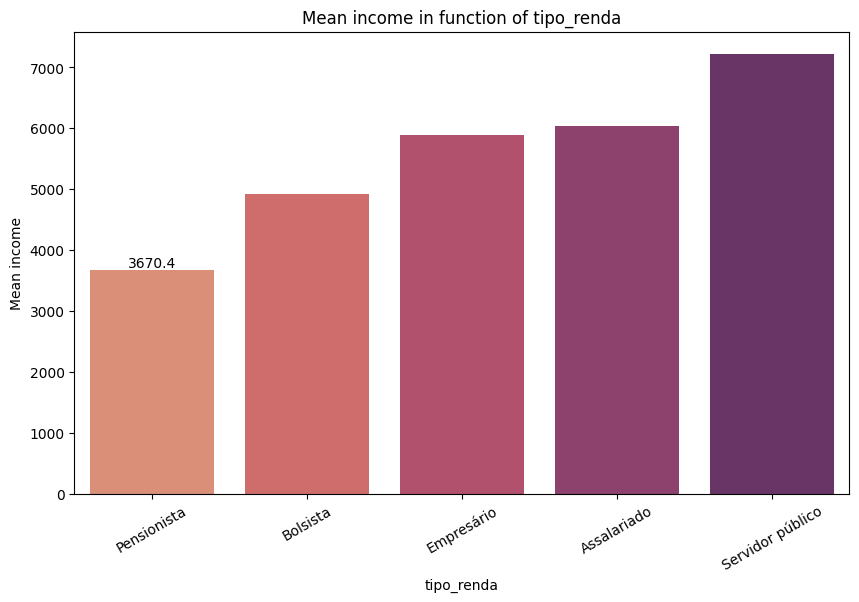

In [113]:
bar('tipo_renda')

The variable `tipo_renda` shows a marked difference compared to the other variables analyzed, with only two classes that have similar average income values. This suggests that `income_type` is a variable with predictive potential for `income`.

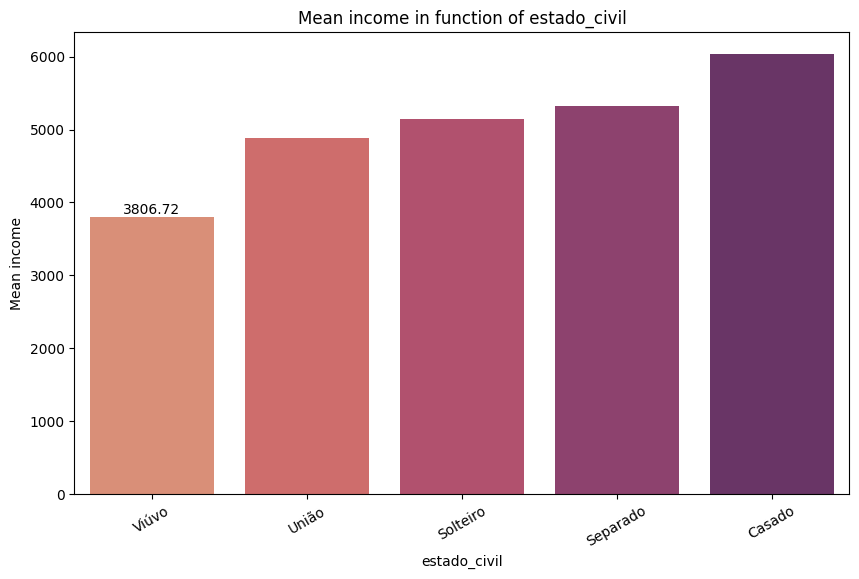

In [114]:
bar('estado_civil')

The variable `estado_civil` shows a consistent difference between its classes in the distribution of income. It also contains relevant information for prediction.

The analyzed categorical variables show differences in average income values, with some exhibiting more pronounced differences than others across the various classes of each variable. Therefore, the categorical data contains relevant information for predicting income.

### Bivariate Analysis with Numerical Variables


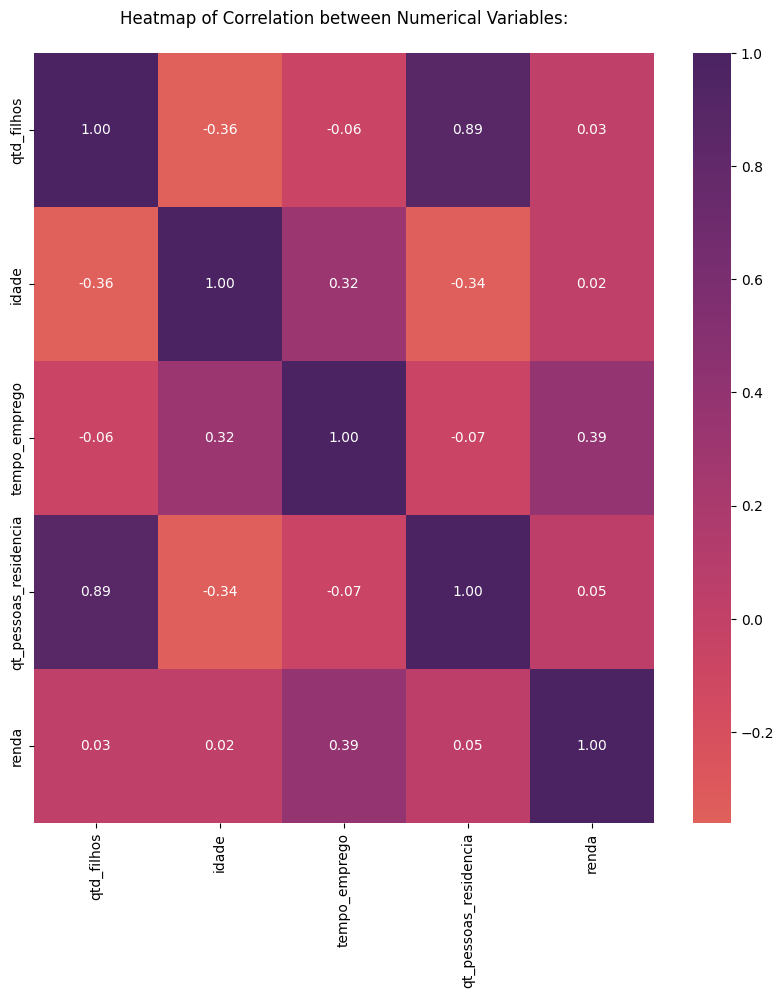

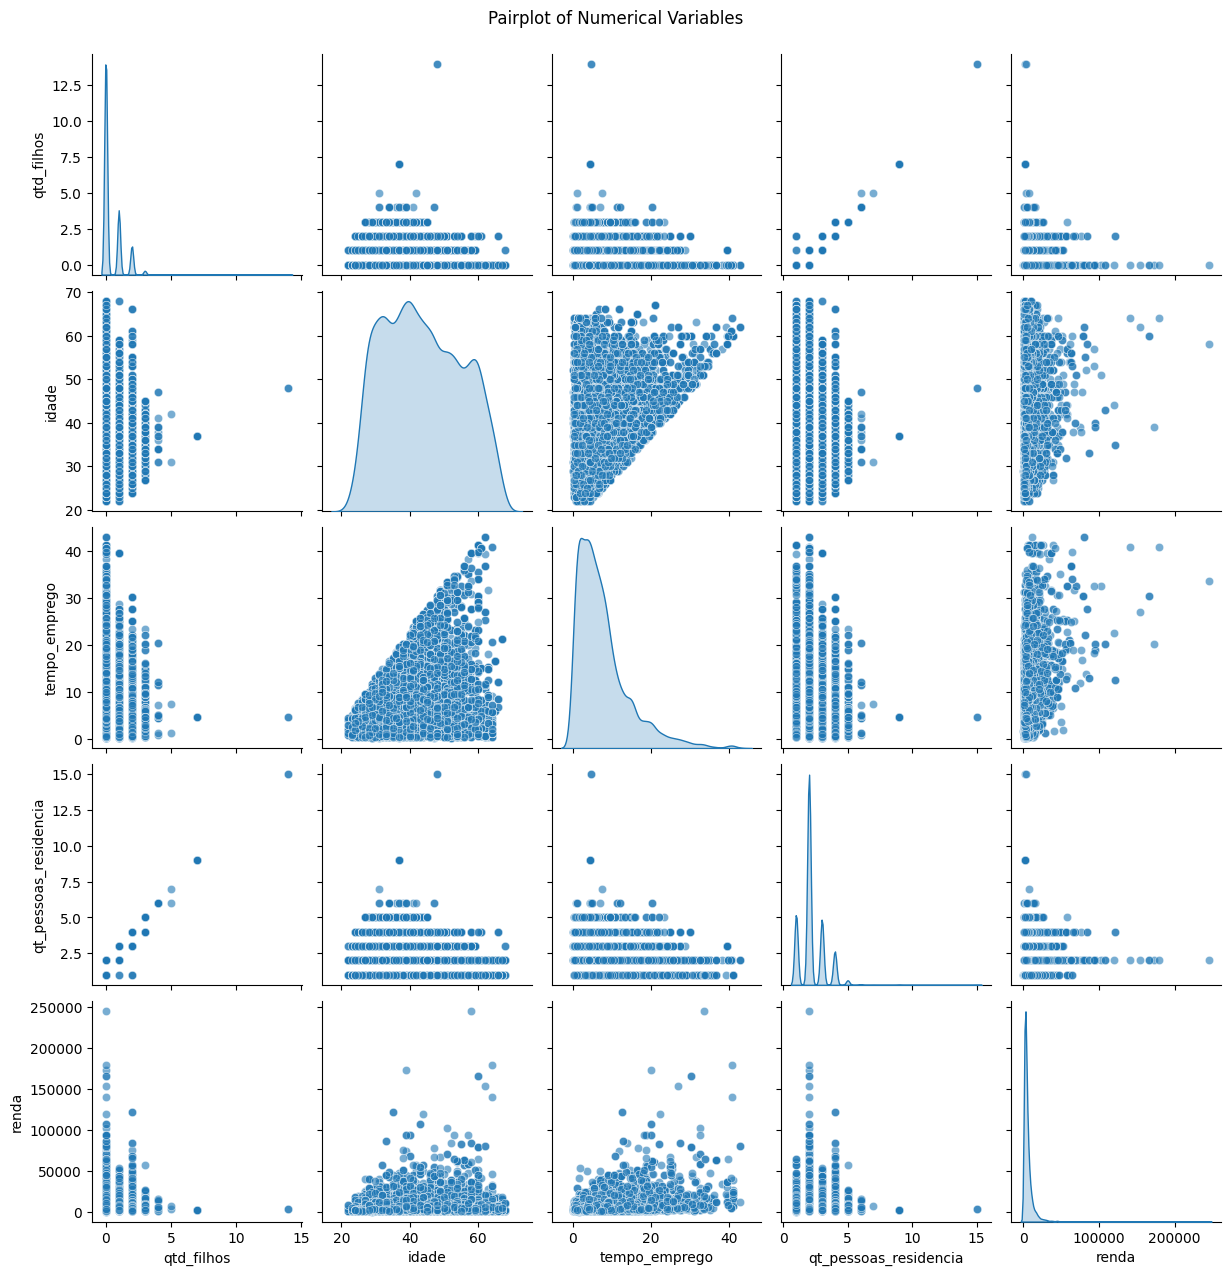

In [115]:
# Defining income_num as the list of numerical columns
income_num = list(income.select_dtypes(include='number'))

# Correlation Heatmap
plt.figure(figsize=(10,10))
plt.title('Heatmap of Correlation between Numerical Variables:\n')
sns.heatmap(income[income_num].drop(['Unnamed: 0', 'id_cliente'], axis=1).corr(),
            annot=True, 
            center=0, 
            cmap='flare',
            fmt='.2f')
plt.show()

# Pairplot of Numerical Variables
sns.pairplot(income[income_num].drop(['Unnamed: 0', 'id_cliente'], axis=1), 
             diag_kind='kde', 
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

### Conclusion of the Correlation Heatmap

The correlation heatmap provides a quantitative view of the linear relationships between the numerical variables in the dataset. Below are the main conclusions:

#### 1. Strong Relationships
- **`qtd_filhos` and `qt_pessoas_residencia` (0.89):**
  - There is a strong positive correlation, indicating that households with more children tend to have a higher total number of people.

#### 2. Moderate Relationships
- **`tempo_emprego` and `income` (0.39):**
  - There is a moderate positive correlation, suggesting that individuals with more years of employment tend to have a higher income.
- **`idade` and `tempo_emprego` (0.32):**
  - Older individuals tend to have more years of employment, which is expected.
- **`idade` and `qt_pessoas_residencia` (-0.34):**
  - There is a moderate negative correlation, showing that younger people tend to live in households with more residents.
- **`idade` and `qtd_filhos` (-0.36):**
  - There is a moderate negative relationship, suggesting that older individuals tend to have fewer children.

#### 3. Weak or Nonexistent Relationships
- **`income` with other variables:**
  - `income` has a low correlation with variables like `idade` (0.02) and `qt_pessoas_residencia` (0.05), indicating that its variation is not strongly related to these variables.
- **`qtd_filhos` and `income` (0.03):**
  - The number of children does not appear to directly influence income, as suggested by the low correlation.

#### 4. General Insights
- The stronger relationships reflect expected patterns, such as the impact of the number of children on the number of people in a household.
- Moderate relationships, such as `tempo_emprego` with `income`, suggest that these factors can be explored in predictive models.
- Weak correlations suggest that external variables, not represented in the dataset, may be more relevant in explaining `income`.

The heatmap complements the pairplot, offering a clear, numerical view of the correlations, helping prioritize variables for future analyses.


**Univariate Distributions (Diagonal):**
- The variable `income` presents a skewed distribution, with a higher concentration at lower values.
- `idade` and `tempo_emprego` have more uniform distributions, but they are concentrated around the center.
- `qtd_filhos` and `qt_pessoas_residencia` have distributions with mostly low values.

**Relationships between Variables (Off-diagonal):**
- There is a **positive correlation** between `tempo_emprego` and `idade`, which is expected since older individuals tend to have more years of employment.
- The variable `income` shows a slight upward trend with respect to `idade` and `tempo_emprego`, though with high dispersion.
- `qtd_filhos` does not seem to have a clear relationship with other variables.
- `qt_pessoas_residencia` has higher density at lower values, with no strong correlations with other variables.

#### Relevant Insights
- The correlation between `idade` and `tempo_emprego` reflects expected patterns in the labor market.
- `income` shows high variability and seems to be influenced by factors beyond those analyzed, suggesting possible outliers or specific subgroups.
- Variables like `qtd_filhos` and `qt_pessoas_residencia` have little relationship with others but contribute to understanding the familial context of individuals.


### Bivariate Analysis with Categorical and Numerical Variables

In [116]:
def box_violin(var: str):
    
    plt.figure(figsize=(12, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=var, y='renda', data=income, palette='viridis')
    plt.title(f'Boxplot income for {var}')
    plt.xlabel(var)
    plt.ylabel('renda')
    plt.xticks(rotation=45)
    
    # Violinplot
    plt.subplot(1, 2, 2)
    sns.violinplot(x=var, y='renda', data=income, palette='viridis')
    plt.title(f'Violinplot income for {var}')
    plt.xlabel(var)
    plt.ylabel('renda')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

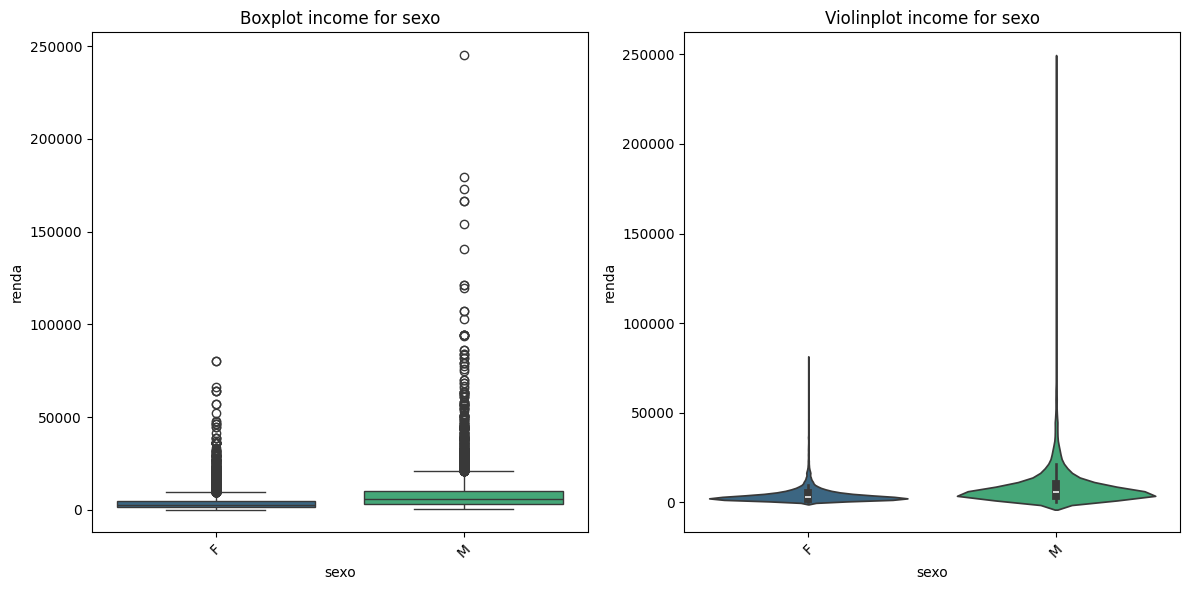

In [117]:
box_violin('sexo')  

### Regression Analysis by Category

In [118]:
def regression_per_category(var: str, num_var: str):    
    categorias = income[var].unique()
    plt.figure(figsize=(12, 6))
    
    for categoria in categorias:
        subset = income[income[var] == categoria]
        sns.regplot(x=num_var, y='renda', data=subset, label=categoria, scatter_kws={'alpha': 0.5})
    
    plt.title(f'Regression of income by {num_var} for each {var}')
    plt.xlabel(num_var)
    plt.ylabel('renda')
    plt.legend()
    plt.show()


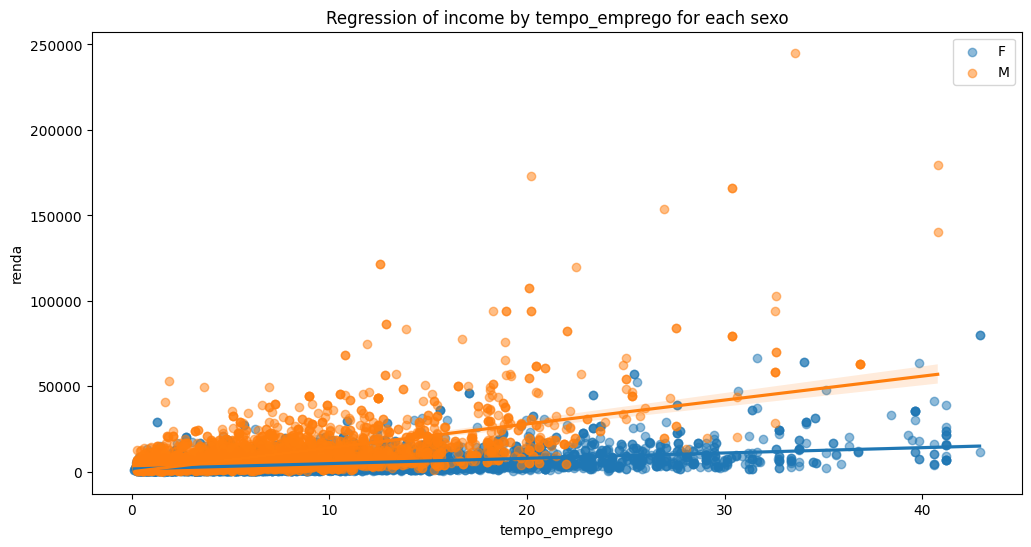

In [119]:
regression_per_category('sexo', 'tempo_emprego')

EXPLAIN

## Step 3 Crisp-DM: Data Preparation
In this step, we typically perform the following operations on the data:

- **Selection**: Have we selected the appropriate data?
- **Cleaning**: We will need to identify and handle missing data.
- **Construction**: Construct new variables.
- **Integration**: We have only one data source, so integration is not necessary.
- **Formatting**: Are the data already in useful formats?

In [120]:
income.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.603,1.000,8060.340
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.184,2.000,1852.150
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838,2.000,2253.890
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.847,3.000,6600.770
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293,1.000,6475.970


In [121]:
income.drop(['id_cliente', 'Unnamed: 0', 'data_ref'], axis=1, inplace = True)

In [122]:
income.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.603,1.000,8060.340
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.184,2.000,1852.150
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838,2.000,2253.890
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.847,3.000,6600.770
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293,1.000,6475.970


,tempo_emprego,percentage_tempo_emprego
missing,2573,17.150
no_missing,12427,82.850
total,15000,100.000


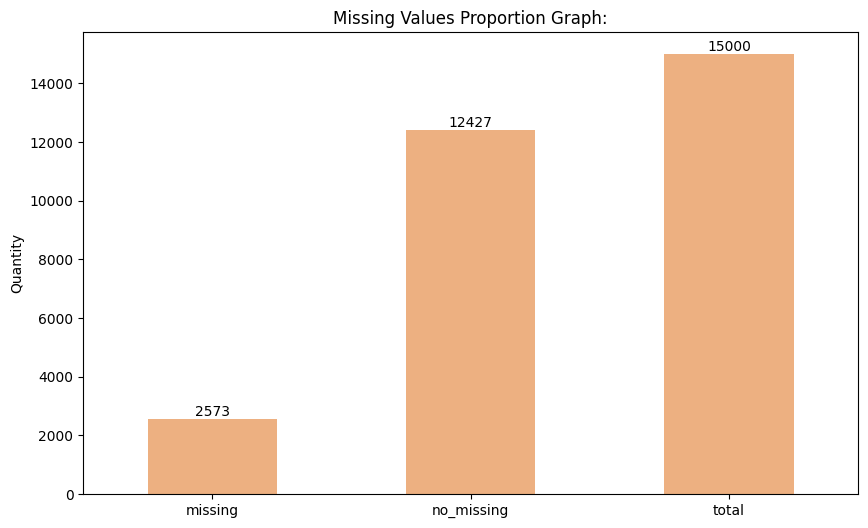

In [123]:
missing_data_dict = {}

if income.isna().any().sum() > 0:

    for col in income.columns:
        
        if income[col].isna().any():
            
            perc = 'percentage' + f'_{col}'
            count = income[income[col].isna()].shape[0]
            total = income.shape[0]
            no_na = income.dropna().shape[0]
            dic = {
                   col: {'missing': count, 
                         'no_missing': no_na,
                         'total': total},
                   
                   perc: {'missing': round(count / total * 100, 2),
                          'no_missing': round(no_na / total * 100, 2),
                          'total': 100}
                   }
            missing_data_dict.update(dic)
else:
    print('There is no missing data.')

if missing_data_dict != {}:

    missing_data = pd.DataFrame(missing_data_dict)
    
    plt.figure(figsize=(10,6))
    ax = missing_data.tempo_emprego.plot(kind='bar', colormap='flare')
    ax.set_title('Missing Values Proportion Graph:')
    ax.set_ylabel('Quantity')
    ax.tick_params(axis='x', rotation=0)
    ax.bar_label(ax.containers[0], fontsize=10)
    leg = plt.legend()
    ax.get_legend().remove()

missing_data


As noted above, the only variable with missing data is `tempo_emprego`, with 2573 missing values, representing 17.15% of the filled data. Since this is a relatively low percentage, excluding these missing values will not significantly impact the rest of the data.

In [124]:
income.dropna(subset='tempo_emprego', inplace=True)

**Construction:** 

Processing the variables into a useful format for selection and model creation:

In [125]:
income['sexo'] = income['sexo'].map({'M': 1, 'F': 0})
income_dummies = pd.get_dummies(income, dtype=int)
income_dummies[['posse_de_veiculo', 'posse_de_imovel']] = income_dummies[['posse_de_veiculo', 'posse_de_imovel']].astype(int)

In [126]:
income_dummies.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda',
       'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'educacao_Primário',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro',
       'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Aluguel',
       'tipo_residencia_Casa', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental'],
      dtype='object')

Using the `replace` method to process the variables:

In [127]:
col = income_dummies.columns.to_list()
col_lower = []

for i in col:
    x = i.lower()
    y = x.replace('á', 'a')
    y = y.replace(' ', '_')
    y = y.replace('ã', 'a')
    y = y.replace('ú', 'u')
    y = y.replace('ó', 'o')
    col_lower.append(y)
    
income_dummies.columns = col_lower

In [128]:
income_dummies.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda',
       'tipo_renda_assalariado', 'tipo_renda_bolsista',
       'tipo_renda_empresario', 'tipo_renda_pensionista',
       'tipo_renda_servidor_publico', 'educacao_primario',
       'educacao_pos_graduaçao', 'educacao_secundario',
       'educacao_superior_completo', 'educacao_superior_incompleto',
       'estado_civil_casado', 'estado_civil_separado', 'estado_civil_solteiro',
       'estado_civil_uniao', 'estado_civil_viuvo', 'tipo_residencia_aluguel',
       'tipo_residencia_casa', 'tipo_residencia_com_os_pais',
       'tipo_residencia_comunitario', 'tipo_residencia_estudio',
       'tipo_residencia_governamental'],
      dtype='object')

Splitting the dataset into training and testing sets, so that we can evaluate the statistically significant variables.

In [129]:
X, y = income_dummies.drop('renda', axis=1), income_dummies['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, shuffle=True)
Xy_train = pd.concat([X_train, y_train], axis=1)

In [130]:
Xy_train

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,tipo_renda_assalariado,tipo_renda_bolsista,tipo_renda_empresario,...,estado_civil_solteiro,estado_civil_uniao,estado_civil_viuvo,tipo_residencia_aluguel,tipo_residencia_casa,tipo_residencia_com_os_pais,tipo_residencia_comunitario,tipo_residencia_estudio,tipo_residencia_governamental,renda
3889,1,1,0,0,50,3.441,2.000,1,0,0,...,0,0,0,0,0,0,1,0,0,1338.930
14483,0,0,0,0,52,2.745,1.000,1,0,0,...,0,0,0,0,1,0,0,0,0,20103.270
762,0,1,0,0,38,6.540,2.000,1,0,0,...,0,0,0,0,1,0,0,0,0,839.210
3078,0,1,1,0,27,7.625,2.000,0,0,1,...,0,0,0,0,1,0,0,0,0,819.950
10423,0,0,0,0,47,4.551,2.000,1,0,0,...,0,0,0,0,1,0,0,0,0,3333.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,1,1,1,37,0.266,3.000,1,0,0,...,0,0,0,0,1,0,0,0,0,2744.440
14610,1,1,1,1,41,4.016,3.000,0,0,1,...,0,0,0,0,1,0,0,0,0,1497.030
9679,0,0,1,2,36,18.044,4.000,1,0,0,...,0,0,0,0,1,0,0,0,0,4617.150
8373,1,0,1,0,37,2.701,2.000,1,0,0,...,0,0,0,0,1,0,0,0,0,2343.190



To perform the selection of statistically significant variables, we will use the statsmodels library. Using the LASSO regularization technique, we will create a loop where the value of alpha will vary. This way, we can select which variables generate the best parameters for the model.

In [131]:
md = smf.ols('''np.log(renda) ~
             sexo +
             posse_de_veiculo + 
             qtd_filhos + 
             
             tipo_renda_assalariado + tipo_renda_bolsista + tipo_renda_empresario + tipo_renda_pensionista + tipo_renda_servidor_publico +
             
             educacao_primario + educacao_pos_graduaçao + educacao_secundario + educacao_superior_completo + educacao_superior_incompleto +
             
             estado_civil_casado + estado_civil_separado + estado_civil_solteiro + estado_civil_uniao + estado_civil_viuvo +
             
             tipo_residencia_aluguel + tipo_residencia_casa + tipo_residencia_com_os_pais + tipo_residencia_comunitario + 
             tipo_residencia_estudio +
             tipo_residencia_governamental +
             
             idade + 
             tempo_emprego + 
             qt_pessoas_residencia''' , data=Xy_train)

alphas = [0, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1]

MSE_lasso = {}
r_squared_lasso = {}
adj_r_squared_lasso = {}
aic_lasso = {}
bic_lasso = {}

for i in alphas:
    reg = md.fit_regularized(method = 'elastic_net',
                             refit = True,
                             L1_wt = 1,
                             alpha = i)   
    
    y_pred = np.exp(reg.predict(X_test))
    mse = mean_squared_error(y_test, y_pred)
    
    MSE_lasso[i] = mse
    r_squared_lasso[i] = round(reg.rsquared,3)
    adj_r_squared_lasso[i] = round(reg.rsquared_adj,3)
    aic_lasso[i] = round(reg.aic,3)
    bic_lasso[i] = round(reg.bic,3)
    
    print(f'\n\n Alpha value = {i} \n MSE: {mse}\n\n {reg.summary()}')




 Alpha value = 0 
 MSE: 44094863.80372529

                             OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:16:31   Log-Likelihood:                -10209.
No. Observations:                9320   AIC:                         2.048e+04
Df Residuals:                    9292   BIC:                         2.068e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Creation of a DataFrame with the parameters generated by LASSO regularization

In [132]:
parameters_lasso = pd.DataFrame({'MSE': MSE_lasso})
parameters_lasso['R_squared'] = r_squared_lasso
parameters_lasso['Adjusted_R_squared'] = adj_r_squared_lasso
parameters_lasso['AIC'] = aic_lasso
parameters_lasso['BIC'] = bic_lasso

parameters_lasso

,MSE,R_squared,Adjusted_R_squared,AIC,BIC
0.000,44094863.804,0.352,0.351,20475.882,20682.940
0.001,44091147.728,0.351,0.350,20466.152,20580.391
0.003,43985187.693,0.351,0.350,20468.247,20561.066
0.005,44195471.718,0.350,0.349,20476.735,20555.274
0.010,44564410.588,0.346,0.346,20525.857,20575.836
0.025,44891964.907,0.341,0.341,20586.128,20621.827
0.050,44891964.907,0.341,0.341,20586.128,20621.827
0.100,44891964.907,0.341,0.341,20586.128,20621.827


The model with the best parameters is the one with alpha = 0.0025, as it has the lowest MSE and one of the highest values, with a lower AIC compared to the others.

Creation of a regression using only the variables selected by LASSO regularization with alpha = 0.0025:

In [133]:
md = smf.ols('''np.log(renda) ~
             sexo + 
             qtd_filhos + 
             tipo_renda_assalariado + tipo_renda_servidor_publico +
             educacao_secundario + educacao_superior_incompleto +
             estado_civil_casado + estado_civil_solteiro +
             idade + 
             tempo_emprego + 
             qt_pessoas_residencia''' ,data=Xy_train)

reg = md.fit()


y_pred = np.exp(reg.predict(X_test))
mse = mean_squared_error(y_test, y_pred)

print(f'\n\n MSE: {mse}')
reg.summary()



 MSE: 43985187.6928325


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     457.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:16:33   Log-Likelihood:                -10221.
No. Observations:                9320   AIC:                         2.047e+04
Df Residuals:                    9308   BIC:                         2.055e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.4933      0.072    103.943      0.000       7.352       7.635
sexo                             0.7972      0.016     49.659      0.000       0.766       0.829
qtd_filhos                       0.0540      0.037      1.459      0.144      -0.019       0.127
tipo_renda_assalariado          -0.1506      0.017     -8.734      0.000      -0.184      -0.117
tipo_renda_servidor_publico     -0.1013      0.028     -3.635      0.000      -0.156      -0.047
educacao_secundario             -0.1019      0.016     -6.411      0.000      -0.133      -0.071
educacao_superior_incompleto    -0.0821      0.037     -2.208      0.027      -0.155      -0.009
estado_civil_casado              0.0028      0.028      0.100      0.920      -0.052       0.058
estado_civil_solteiro           -0.0651      0.033     -1.956      0.050      -0.130       0.000
idade                            0.0057      0.001      6.252      0.000       0.004       0.007
tempo_emprego                    0.0614      0.001     51.277      0.000       0.059       0.064
qt_pessoas_residencia           -0.0353      0.036     -0.986      0.324      -0.106       0.035
==============================================================================
Omnibus:                        0.203   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.177
Skew:                           0.006   Prob(JB):                        0.915
Kurtosis:                       3.018   Cond. No.                         495.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Selection of significant variables and creation of a DataFrame with only the selected ones:

In [134]:
var_significant = ['sexo', 
                    'qtd_filhos', 
                    'tipo_renda_assalariado',
                    'tipo_renda_servidor_publico',
                    'educacao_secundario',
                    'educacao_superior_incompleto',
                    'estado_civil_casado',
                    'estado_civil_solteiro',
                    'idade',
                    'tempo_emprego',
                    'qt_pessoas_residencia',
                    'renda'
                    ]
income_significant = income_dummies[var_significant]
income_significant.head()

,sexo,qtd_filhos,tipo_renda_assalariado,tipo_renda_servidor_publico,educacao_secundario,educacao_superior_incompleto,estado_civil_casado,estado_civil_solteiro,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,0,0,0,1,0,0,1,26,6.603,1.000,8060.340
1,1,0,1,0,0,0,1,0,28,7.184,2.000,1852.150
2,0,0,0,0,0,0,1,0,35,0.838,2.000,2253.890
3,0,1,0,1,0,0,1,0,30,4.847,3.000,6600.770
4,1,0,1,0,1,0,0,1,33,4.293,1.000,6475.970


In [135]:
X, y = income_significant.drop('renda', axis=1), income_significant['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150, shuffle=True)

## Step 4 Crisp-DM: Modeling
In this step, we will build the model. The typical steps are:
- Select the modeling technique
- Design the test
- Evaluate the model

In this project, decision trees will be used. Since the goal is to predict income, which is a continuous quantitative variable, the regression tree structure will be used.

On this occasion, the tree will be run in a simple way, applying the dataset with the variables selected previously. This way, it will be possible to analyze the hyperparameters and how to improve them.


In [136]:
tree_simple = DecisionTreeRegressor(random_state=42)

### Rodando o modelo


Model training with only selected variables

In [137]:
tree_simple.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Creation of the dataset with the hyperparameters of the trained model for comparison:


In [138]:
pd.set_option('float_format', '{:.3f}'.format)

index = ['r_squared', 'mean_absolute_error', 'root_mean_squared_error']

hyperparameters_simple = pd.DataFrame({'train_set_simple': r2_score(y_train, tree_simple.predict(X_train))}, index=index)
hyperparameters_simple.loc['mean_absolute_error', 'train_set_simple'] = mean_absolute_error(y_train, tree_simple.predict(X_train))
hyperparameters_simple.loc['root_mean_squared_error', 'train_set_simple'] = mean_squared_error(y_train, tree_simple.predict(X_train)) ** 0.5
hyperparameters_simple['test_set_simple'] = r2_score(y_test, tree_simple.predict(X_test))
hyperparameters_simple.loc['mean_absolute_error', 'test_set_simple'] = mean_absolute_error(y_test, tree_simple.predict(X_test))
hyperparameters_simple.loc['root_mean_squared_error', 'test_set_simple'] = mean_squared_error(y_test, tree_simple.predict(X_test)) ** 0.5

hyperparameters_simple


,train_set_simple,test_set_simple
r_squared,0.821,0.219
mean_absolute_error,1492.571,3208.312
root_mean_squared_error,3856.857,7338.485


As we can observe, the value of [r_squared] differs greatly between the training and test sets. The same happens for the mean absolute error and the root mean squared error.

Testing the best depth and the minimum number of samples per leaf of the tree:


Text(0.5, 36.72222222222221, 'Minimum number of samples per leaf \n\n The R-squared value is inside each cell')

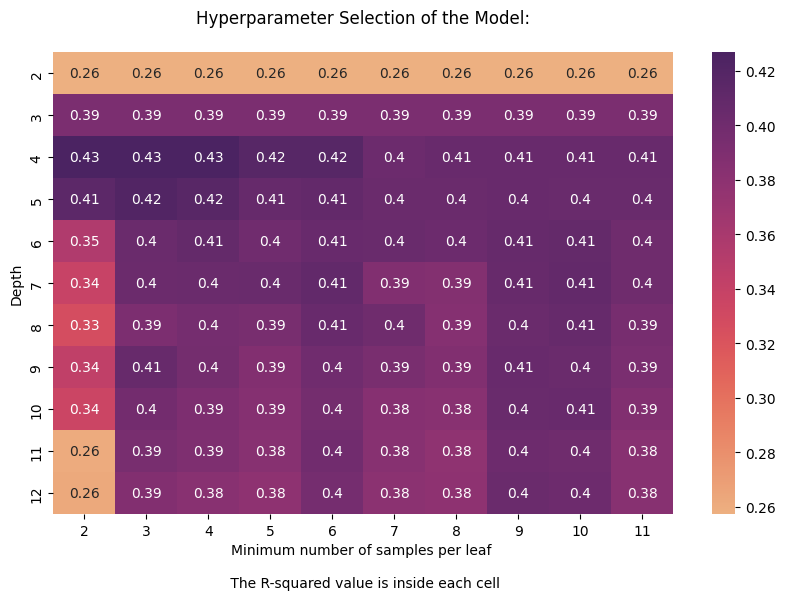

In [139]:
rsqr = []
ind_i = []
ind_j = []

for i in range(2, 13):
    for j in range(2, 12):
        tree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        rsq = tree.score(X_test, y_test)
        rsqr.append(rsq)
        ind_i.append(i)
        ind_j.append(j)
        
df_rsqr = pd.DataFrame({'r_squared':rsqr, 
                        'Depth':ind_i, 
                        'min_samples_leaf':ind_j}
                       )

plt.figure(figsize=(10,6))
plt.title('Hyperparameter Selection of the Model:\n')
sns.heatmap(df_rsqr.pivot(index='Depth',
                          columns='min_samples_leaf',
                          values='r_squared'),
            cmap='flare',
            annot=True
            )
plt.xlabel('Minimum number of samples per leaf \n\n The R-squared value is inside each cell')


According to the generated data, a depth of 4 combined with 2, 3, or 4 minimum samples per leaf yields the best R-squared value for the model. Therefore, in order to simplify the tree, we will work with the number 2.

In [140]:
tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, random_state=42)

In [141]:
tree = tree.fit(X_train, y_train)

In [142]:
index=['r_squared', 'mean_absolute_error', 'root_mean_squared_error']

hiperparameters = pd.DataFrame({'train_set': r2_score(y_train, tree.predict(X_train))}, index= index)
hiperparameters.loc['mean_absolute_error', 'train_set'] = mean_absolute_error(y_train, tree.predict(X_train))
hiperparameters.loc['root_mean_squared_error', 'train_set'] = mean_squared_error(y_train, tree.predict(X_train)) ** 0.5
hiperparameters['test_set'] = r2_score(y_test, tree.predict(X_test))
hiperparameters.loc['mean_absolute_error','test_set'] = mean_absolute_error(y_test, tree.predict(X_test))
hiperparameters.loc['root_mean_squared_error', 'test_set'] = mean_squared_error(y_test, tree.predict(X_test)) ** 0.5

hiperparameters

,train_set,test_set
r_squared,0.484,0.427
mean_absolute_error,3443.028,3411.293
root_mean_squared_error,6555.994,6288.597


According to the data above, it is noticeable that the values, both for the training set and the test set, show similar values, behaving in a more homogeneous way, which is better for prediction.








## Etapa 5 Crisp-DM: Avaliação dos resultados


Metrics analytics of final model created: 

In [143]:
hiperparameters

,train_set,test_set
r_squared,0.484,0.427
mean_absolute_error,3443.028,3411.293
root_mean_squared_error,6555.994,6288.597


As shown by the DataFrame above, the value of the coefficient of determination, or R-squared, is about 48% explanatory regarding the predicted data for the training set, and 42% for the test set.

The MAE (Mean Absolute Error) shows us that the predicted income varies around 3400 more or less from the real value, both for the training set and the test set.

The MSE (Mean Squared Error) represents the average squared error of the predictions. To get a closer approximation to the real values, we take the square root of the MSE using the RMSE (Root Mean Squared Error) metric. Using this metric, it is possible to analyze how much the model is off, being penalized for possible outliers. The training set shows an error of about 6500 from the real value, while the test set shows an error of about 6200.

The model's hyperparameters were adjusted to obtain the best metrics.


In [144]:
print('Ratio of average income with mean absolute error in the training set:')
print(income['renda'].mean()/hiperparameters['train_set'].loc['mean_absolute_error'])
print('\nRatio of average income with mean absolute error in the test set:')
print(income['renda'].mean()/hiperparameters['test_set'].loc['mean_absolute_error'])


Ratio of average income with mean absolute error in the training set:
1.7765002568698007

Ratio of average income with mean absolute error in the test set:
1.7930267050293092


As demonstrated above, the average income values are higher than the mean absolute errors of the predicted values, demonstrating the predictive capacity of the model.

## Step 6 Crisp-DM: Deployment
In this step, we put the developed model into use, typically implementing the model in a system that makes decisions with some level of automation.


In this step, we put the developed model into use, typically implementing the model in a system that makes decisions with some level of automation.

Since income prediction is commonly used by financial institutions for purposes such as credit limits, predicted loan amounts, and many other applications, the function below creates credit limit classes, card types, and loan amounts for each different predicted income value.

Of course, these items are defined using many other variables, such as the relationship with other financial institutions, whether the client is delinquent, asset ownership, and others that are necessary for determining them. But for visualization purposes, only the income variable was used.

The loan amount was calculated based on income. It was calculated so that it can be paid in 24 installments, with the value of each installment not exceeding about 30% of the total predicted income, thus summing up to the final amount.

Credit classification function:


In [145]:
def predict_income(df: pd.DataFrame):
    predicted_income = list(tree.predict(df))
    income_data = []
    for i in predicted_income:
        if i <= 2500:
            dic = {'predicted_income': i, 'credit_limit': 3000, 'card_class': 'standard', 'loan_granted': 18000}
            income_data.append(dic)
        elif i <= 5000:
            dic = {'predicted_income': i, 'credit_limit': 6000, 'card_class': 'gold', 'loan_granted': 36000}
            income_data.append(dic)
        elif i <= 7500:
            dic = {'predicted_income': i, 'credit_limit': 8500, 'card_class': 'platinum', 'loan_granted': 54000}
            income_data.append(dic)
        elif i <= 10000:
            dic = {'predicted_income': i, 'credit_limit': 15000, 'card_class': 'black', 'loan_granted': 72000}
            income_data.append(dic)
        elif i <= 15000:
            dic = {'predicted_income': i, 'credit_limit': 20000, 'card_class': 'black', 'loan_granted': 100000}
            income_data.append(dic)
        elif i > 15000:
            dic = {'predicted_income': i, 'credit_limit': 'unlimited', 'card_class': 'black', 'loan_granted': 150000}
            income_data.append(dic)
        
    income_data = pd.DataFrame(income_data)
    return income_data.sample(15)


In [146]:
predict_income(X_test)

,predicted_income,credit_limit,card_class,loan_granted
1834,5063.104,8500,platinum,54000
1385,2816.735,6000,gold,36000
1578,3521.751,6000,gold,36000
875,2816.735,6000,gold,36000
1805,6118.001,8500,platinum,54000
831,3521.751,6000,gold,36000
3394,4827.253,6000,gold,36000
1286,5063.104,8500,platinum,54000
3347,2816.735,6000,gold,36000
2804,4827.253,6000,gold,36000


Thus, the model proves to be effective. It makes predictions regarding the average income of clients based on other selected attributes, and can be used in various applications, as demonstrated in the example above. In this example, credit limit, card class, and the loan amount granted were briefly and succinctly assigned.


## Deploy

In [147]:
# save the model
joblib.dump(tree, 'prevision_income_model.pkl')

['prevision_income_model.pkl']